In [13]:
import arviz as az
from risk_experiment.utils.data import get_all_behavior
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os.path as op
import pingouin

In [14]:
participants = pd.read_csv('/data/ds-risk/participants.tsv', sep='\t')
participants.describe()

,age
count,30.000000
mean,24.566667
std,3.287210
min,20.000000
25%,22.000000
50%,24.000000
75%,26.000000
max,34.000000


In [15]:
participants.groupby('sex').size()

sex
female    14
male      16
dtype: int64

In [16]:
import scipy.stats as ss

dist = ss.norm(loc=3.5, scale=1./ss.norm().ppf(0.8) * (3.5-1))

In [17]:
df = get_all_behavior(bids_folder='/data/ds-risk')

100%|██████████| 30/30 [00:05<00:00,  5.53it/s]


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_84890/2032188372.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'bin(risky/safe)']).mean()


Text(0.5, 1.05, 'Raw response curves')

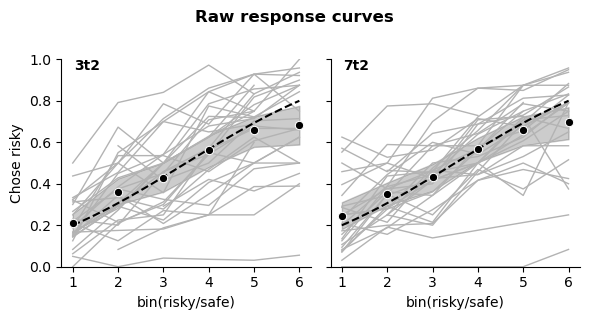

In [7]:
tmp = df.reset_index().groupby(['subject','session', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)

# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', color='k', linewidth=0.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw response curves', fontweight='bold', y=1.05)

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_84890/1816174011.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_84890/1816174011.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()


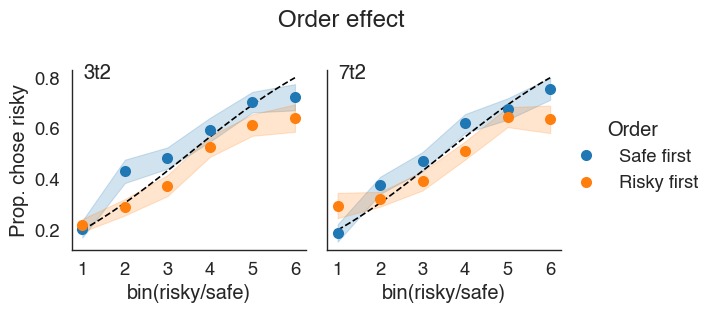

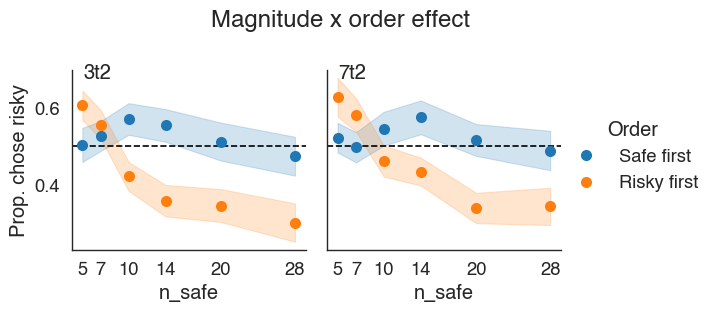

In [8]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8, markeredgewidth=0)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=range(1, 7))
g.fig.suptitle('Order effect', fontweight='bold', y=1.05)

g.add_legend()

tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()

g.savefig('/data/ds-risk/derivatives/figures/order_effect.pdf')

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)

for session, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markeredgewidth=0, markersize=8)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=df.n_safe.unique())
g.fig.suptitle('Magnitude x order effect', fontweight='bold', y=1.05)

g.add_legend()
g.savefig('/data/ds-risk/derivatives/figures/mag_order_effect.pdf')

In [9]:
n_risk_bins = 8
def get_risk_bin(d):
    try: 
        return pd.qcut(d, n_risk_bins, range(1, n_risk_bins+1))
    except Exception as e:
        n = len(d)
        ix = np.linspace(1, n_risk_bins+1, n, False)

        d[d.sort_values().index] = np.floor(ix)
        
        return d
df['bin(risky/safe)'] = df.groupby(['subject'], group_keys=False)['frac'].apply(get_risk_bin)


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_84890/448089825.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_84890/448089825.py:25: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()


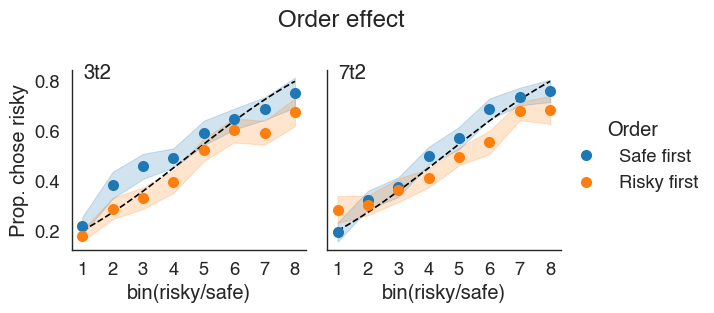

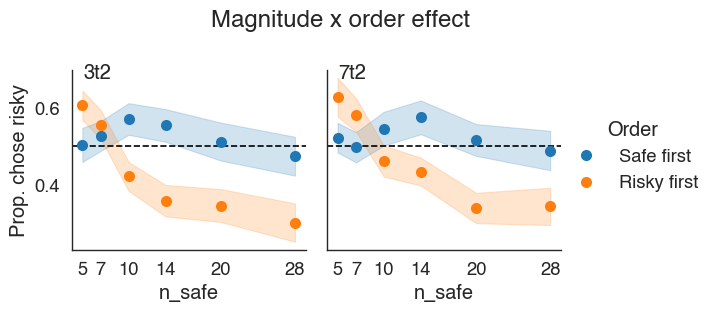

In [12]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 8., 50, True)
dist = ss.norm(loc=(n_risk_bins+1)/2., scale=1./ss.norm().ppf(0.8) * (((n_risk_bins+1)/2.)-1))

# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8, markeredgewidth=0)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=range(1, n_risk_bins+1))
g.fig.suptitle('Order effect', fontweight='bold', y=1.05)

g.add_legend()

tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()

g.savefig('/data/ds-risk/derivatives/figures/order_effect.pdf')

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)

for session, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markeredgewidth=0, markersize=8)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=df.n_safe.unique())
g.fig.suptitle('Magnitude x order effect', fontweight='bold', y=1.05)

g.add_legend()
g.savefig('/data/ds-risk/derivatives/figures/mag_order_effect.pdf')

In [68]:
pingouin.rm_anova(tmp.xs('3t2', 0, 'session').reset_index(), 'chose_risky', ['risky_first', 'n_safe'], subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,risky_first,0.744835,1,29,0.744835,14.494932,6.734820e-04,6.734820e-04,0.037867,1.000000
1,n_safe,1.253993,5,145,0.250799,6.151160,3.363734e-05,4.016558e-03,0.062144,0.392409
2,risky_first * n_safe,1.159592,5,145,0.231918,14.206480,2.617751e-11,5.219393e-09,0.057736,0.750435


In [69]:
pingouin.rm_anova(tmp.xs('7t2', 0, 'session').reset_index(), 'chose_risky', ['risky_first', 'n_safe'], subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,risky_first,0.313585,1,29,0.313585,5.826613,2.232664e-02,2.232664e-02,0.016116,1.000000
1,n_safe,1.133030,5,145,0.226606,5.879048,5.610020e-05,4.969432e-03,0.055876,0.393572
2,risky_first * n_safe,1.119097,5,145,0.223819,13.450666,8.922346e-11,7.369511e-08,0.055227,0.665045


/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_80601/307388716.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject', 'Order', 'bin(risky/safe)']).mean()
/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_80601/307388716.py:21: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()


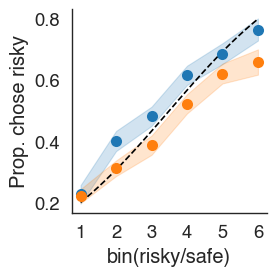

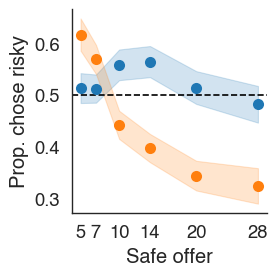

In [65]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.5, palette='tab10')
tmp = df.reset_index().groupby(['subject', 'Order', 'bin(risky/safe)']).mean()

g = sns.FacetGrid(data=tmp.reset_index(), hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


ax = g.ax
# Add the title as an annotation within the plot
ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markersize=8, markeredgewidth=0)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=range(1, 7))
# g.fig.suptitle('Order effect', fontweight='bold', y=1.05)

# g.add_legend()

tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe']).mean()

g.savefig('/data/ds-risk/derivatives/figures/order_effect_combined.pdf')

g = sns.FacetGrid(data=tmp.reset_index(), hue='Order', hue_order=['Safe first', 'Risky first'])
sns.despine()
# plt.ylim(0, 1)

# for session, ax in g.axes_dict.items():
    # Add the title as an annotation within the plot
ax = g.ax
ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=0.0, errorbar='se', markeredgewidth=0, markersize=8)
g.set_titles('')
g.set(ylabel='Prop. chose risky', xticks=df.n_safe.unique(), xlabel='Safe offer')
# g.fig.suptitle('Magnitude x order effect', fontweight='bold', y=1.05)

# g.add_legend()
g.savefig('/data/ds-risk/derivatives/figures/mag_order_effect_combined.pdf')

In [66]:
pingouin.rm_anova(tmp.reset_index(), 'chose_risky', ['risky_first', 'n_safe'], subject='subject')

/Users/gdehol/mambaforge/lib/python3.10/site-packages/pingouin/distribution.py:481: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data = data.groupby(level=1, axis=1, observed=True).diff(axis=1).dropna(axis=1)


,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,risky_first,0.506250,1,29,0.506250,12.221445,1.540886e-03,1.540886e-03,0.036257,1.000000
1,n_safe,1.165451,5,145,0.233090,7.254475,4.314404e-06,3.024379e-03,0.079705,0.332904
2,risky_first * n_safe,1.121484,5,145,0.224297,20.569205,1.731532e-15,6.634144e-11,0.076929,0.655523


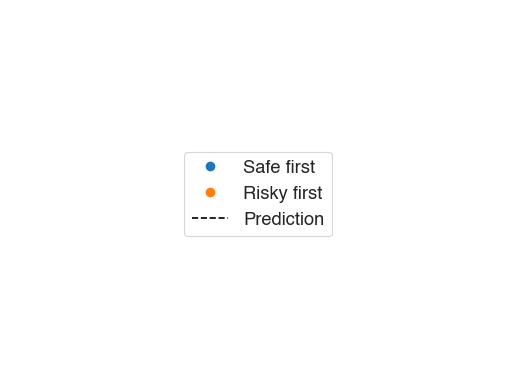

In [63]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[0], label='Safe first', markersize=8),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=sns.color_palette()[1], label='Risky first', markersize=8),
                Line2D([0], [0], color='k', ls='--', label='Prediction'),]

# Create the figure
fig, ax = plt.subplots()
legend = ax.legend(handles=legend_elements, loc='center')


plt.axis('off')

bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
# fig.savefig(filename, dpi="figure", bbox_inches=bbox)

plt.savefig('/data/ds-risk/derivatives/figures/figure1_legend.pdf', bbox_inches=bbox)

In [43]:
g.ax

<Axes: xlabel='n_safe', ylabel='Prop. chose risky'>

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_23720/1200842170.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'uncertainty', 'bin(risky/safe)', 'n_safe']).mean()


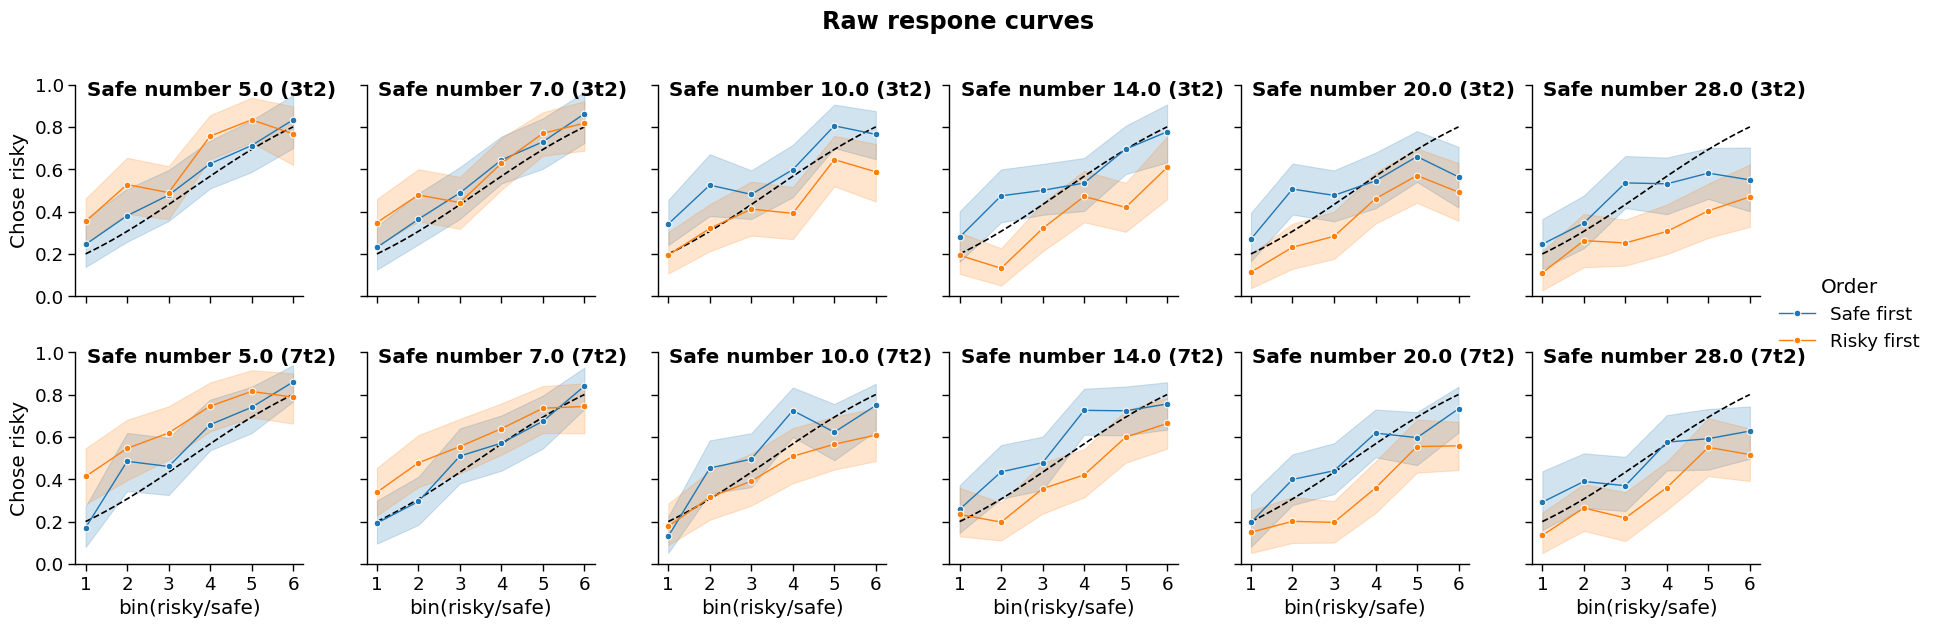

In [36]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'uncertainty', 'bin(risky/safe)', 'n_safe']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),row='session', hue='Order', col='n_safe', hue_order=['Safe first', 'Risky first'])
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for d, ax in g.axes_dict.items():
    ax.text(.05, .95, f'Safe number {d[1]} ({d[0]})', transform=ax.transAxes, fontweight="bold")
    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/2559932503.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)']).mean().reset_index(), col='session', palette='coolwarm')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


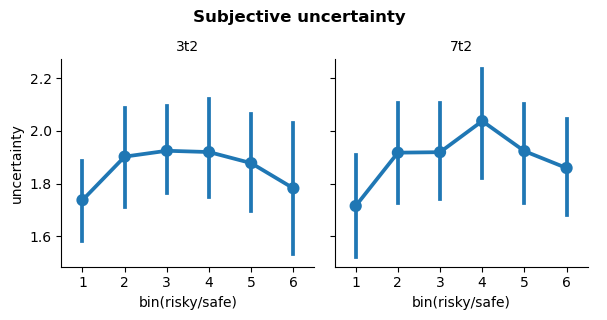

In [7]:
g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)']).mean().reset_index(), col='session', palette='coolwarm')
g.map(sns.pointplot, 'bin(risky/safe)', 'uncertainty')
g.add_legend()
g.fig.suptitle('Subjective uncertainty', y=1.05, fontweight='bold')

g.set_titles('{col_name}')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/3410963002.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)', 'chose_risky']).mean().reset_index(), col='session', hue='chose_risky', palette='coolwarm')
/Users/gdehol/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


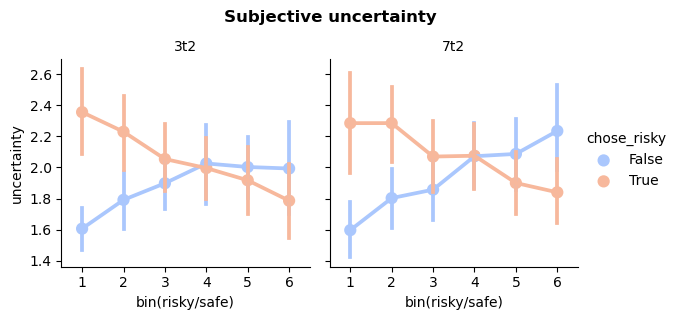

In [8]:
g = sns.FacetGrid(data=df.groupby(['subject', 'session', 'bin(risky/safe)', 'chose_risky']).mean().reset_index(), col='session', hue='chose_risky', palette='coolwarm')
g.map(sns.pointplot, 'bin(risky/safe)', 'uncertainty')
g.add_legend()
g.fig.suptitle('Subjective uncertainty', y=1.05, fontweight='bold')

g.set_titles('{col_name}')

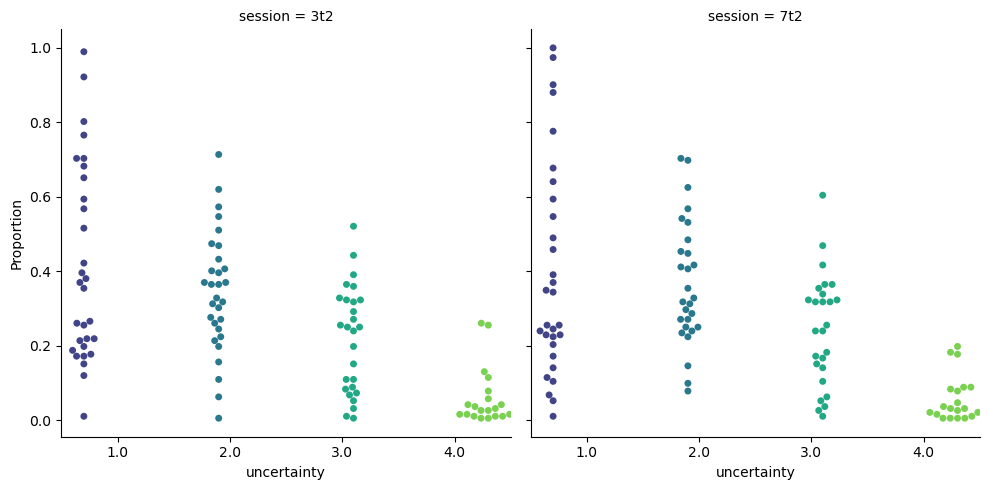

In [9]:
prop = (df.groupby(['subject', 'session', 'uncertainty']).size() / df.groupby(['subject', 'session']).size()).to_frame('Proportion')

sns.catplot(data=prop.reset_index(), x='uncertainty', y='Proportion', hue='uncertainty', palette=sns.color_palette('viridis', n_colors=4), dodge=True, col='session', kind='swarm')

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/1240398108.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe', 'uncertainty']).mean()


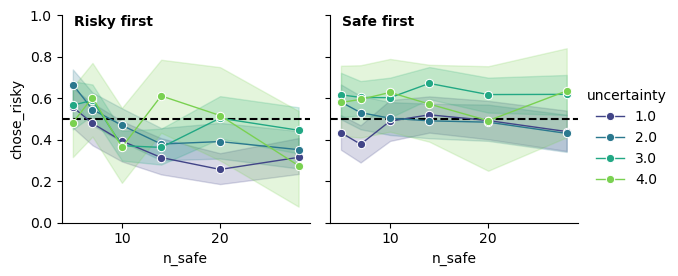

In [10]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'n_safe', 'uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='uncertainty', palette=sns.color_palette('viridis',n_colors=4))
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')



g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
# g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/2522612158.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)', 'uncertainty']).mean()


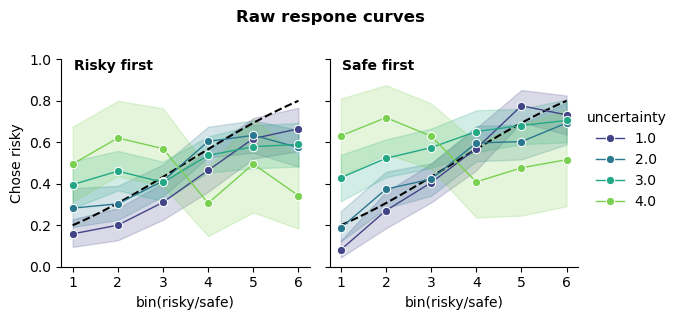

In [11]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)', 'uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='uncertainty', palette='viridis')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    # sns.lineplot(
    #     data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
    #     estimator=None, linewidth=1, ax=ax, hue='risky_first',
    # )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw respone curves', fontweight='bold', y=1.05)

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/1910364759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'uncertainty']).mean()


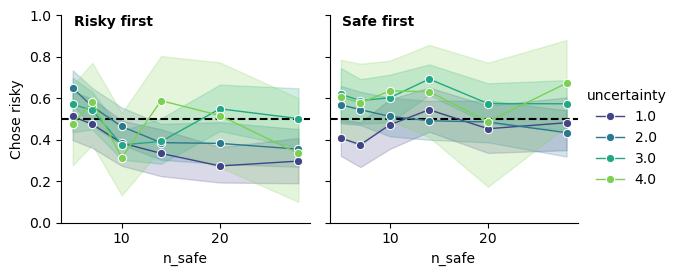

In [12]:
tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='uncertainty', palette='viridis')
sns.despine()
plt.ylim(0, 1)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky')

g.add_legend()

/var/folders/d4/cpqhwlbn301clph1qk64k01nmjkty3/T/ipykernel_30257/2974030771.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'median_split_uncertainty']).mean()


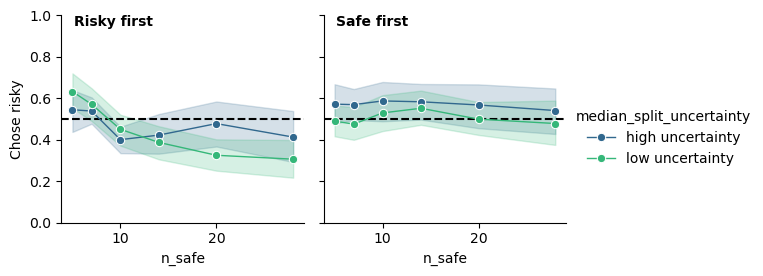

In [13]:
tmp = df.reset_index().groupby(['subject','Order', 'n_safe', 'median_split_uncertainty']).mean()
# tmp['Order'] = tmp.index.get_level_values('risky_first').map({True:'Risky first', False:'Safe first'})

g = sns.FacetGrid(data=tmp.reset_index(),col='Order', hue='median_split_uncertainty', palette='viridis')
sns.despine()
plt.ylim(0, 1)


# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")
    ax.axhline(0.5, c='k', ls='--')

g.map(sns.lineplot, 'n_safe', 'chose_risky', marker='o', linewidth=1.0)
g.set_titles('')
g.set(ylabel='Chose risky')

g.add_legend()

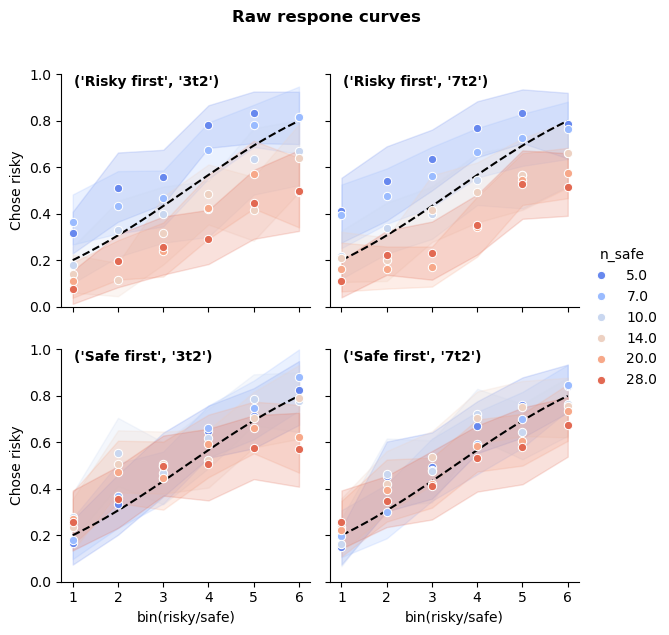

In [ ]:
tmp = df.reset_index().groupby(['subject','session', 'Order', 'bin(risky/safe)', 'n_safe']).mean()

g = sns.FacetGrid(data=tmp.reset_index(),col='session', hue='n_safe', row='Order', palette='coolwarm')
sns.despine()
plt.ylim(0, 1)
x = np.linspace(1., 6., 50, True)

# Iterate over each subplot to customize further
for session, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.05, .95, session, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    # sns.lineplot(
    #     data=tmp.xs(session, 0, 'session'), x="bin(risky/safe)", y="chose_risky", units="subject",
    #     estimator=None, linewidth=1, ax=ax, hue='risky_first',
    # )

    ax.plot(x, dist.cdf(x), c='k', ls='--')

g.map(sns.lineplot, 'bin(risky/safe)', 'chose_risky', marker='o', linewidth=0.0)
g.set_titles('')
g.set(ylabel='Chose risky', xticks=range(1, 7))
g.fig.suptitle('Raw response curves', fontweight='bold', y=1.05)

g.add_legend()